In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns', 500)
label_encoder = LabelEncoder()


housing_numeric = pd.read_pickle("~/Documents/NYCDSA/Third Project/ML_Ames_Housing/Python/housing_numeric.pkl")
housing_factor = pd.read_pickle("~/Documents/NYCDSA/Third Project/ML_Ames_Housing/Python/housing_factor.pkl")

In [81]:
housing_numeric = housing_numeric.drop(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF'], axis=1)
housing_numeric = housing_numeric.drop(['BsmtFinSF2', 'BsmtUnfSF', 'BsmtFinSF1'], axis=1)
housing_numeric['TotalBath'] = housing_numeric['BsmtFullBath'] + (housing_numeric['BsmtHalfBath']*0.5) + housing_numeric['FullBath'] + (housing_numeric['HalfBath']*0.5)
housing_factor['MixedExterior'] = housing_factor['Exterior1st'] + ' - ' + housing_factor['Exterior2nd']
housing_factor = housing_factor.drop(['Exterior1st', 'Exterior2nd', 'PID'], axis=1)
housing_numeric = housing_numeric.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)
SalePrice = housing_numeric['SalePrice']

In [82]:
housing_numeric = housing_numeric.drop(['SalePrice'], axis=1)
scaler = StandardScaler()
scaler.fit(housing_numeric)
housing_numeric_scaled = scaler.transform(housing_numeric)
housing_numeric_scaled = pd.DataFrame(housing_numeric_scaled, columns = housing_numeric.columns, index = housing_numeric.index)
housing_numeric_scaled.to_pickle('housing_numeric_scaled.pkl')
housing_factor.to_pickle('housing_factor_tuned.pkl')

In [83]:
housing_combined_scaled = pd.concat([housing_numeric_scaled,housing_factor],axis=1)
housing_combined_scaled = housing_combined_scaled[['GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'Fireplaces', 'TotalBath', 'LotArea', 'MasVnrArea',
                                                             'OverallCond', 'GarageArea', 'YearRemodAdd', 'Foundation',
                                                             'TotRmsAbvGrd', 'GarageYrBlt', 'PoolArea', 'YrSold', 'MoSold', 'LotFrontage', 'OverallQual',
                                                             'BsmtQual', 'KitchenQual', "BsmtExposure", 'FireplaceQu', 'Neighborhood', 'HeatingQC', 'OpenPorchSF']].copy()

In [84]:
categorical_columns = housing_combined_scaled.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = encoder.fit_transform(housing_combined_scaled[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([housing_combined_scaled.reset_index(drop=True), one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)
df_encoded

,GrLivArea,YearBuilt,TotalBsmtSF,Fireplaces,TotalBath,LotArea,MasVnrArea,GarageArea,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,PoolArea,YrSold,MoSold,LotFrontage,OpenPorchSF,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_Po,BsmtQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
0,-1.289598,-1.053847,-0.431859,0.610254,-0.258698,-0.274468,-0.566310,-0.327115,-1.647539,-1.555298,-1.580577,-0.054791,1.647483,-1.180008,6.869938e-16,-0.697756,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.894555,0.460593,0.029430,-0.931817,0.996049,-0.724294,0.283369,-0.968399,0.012109,-0.903785,0.292044,-0.054791,0.885334,-1.554522,-1.281863e+00,0.892001,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.992804,-1.356735,-0.477270,-0.931817,-1.513445,-0.499689,-0.566310,-1.209484,1.134812,-0.903785,-1.955101,-0.054791,-0.638965,1.816101,-4.116906e-01,-0.697756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.915024,-2.366362,-1.509792,-0.931817,-1.513445,-0.242962,-0.566310,-0.896074,0.939559,-0.252272,-1.538963,-0.054791,0.885334,-0.430981,5.551672e-01,-0.697756,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.366305,1.032715,-0.541803,-0.931817,1.623423,-0.211702,-0.566310,0.294882,0.841933,-0.252272,0.999478,-0.054791,0.885334,1.816101,7.173829e-02,-0.016432,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,-1.093100,-1.827894,-0.202409,0.610254,-1

In [85]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso 

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lasso = Lasso(alpha=1, tol = 0.1)
lasso.fit(df_encoded, SalePrice)
lasso.score(df_encoded, SalePrice)

0.8878455798764123

In [86]:
cross_val_score_lasso = cross_val_score(lasso, df_encoded, SalePrice, cv=kf)
print(cross_val_score_lasso)
print('Avg Score:',np.mean(cross_val_score_lasso))
print('Variance:',np.var(cross_val_score_lasso))

[0.88283829 0.81911043 0.90398094 0.8934399  0.87602652]
Avg Score: 0.8750792176719646
Variance: 0.000873205921814867


In [87]:
fold_num=1
scores_list = []
coefficients_list = []
cv_scores = []
coefficients = []
for train_index, test_index in kf.split(df_encoded):
    X_train, X_test = df_encoded.iloc[train_index], df_encoded.iloc[test_index]
    y_train, y_test = SalePrice.iloc[train_index], SalePrice.iloc[test_index]
    lasso.fit(X_train, y_train)
    score = lasso.score(X_test, y_test)
    print(f'Fold {fold_num} score:', score)
    coefficients_list.append({
        'coef': lasso.coef_,
    })
    coefficients.append(lasso.coef_)
    cv_scores.append(score)
    fold_num += 1

coefficients_list

Fold 1 score: 0.8828382901348866
Fold 2 score: 0.8191104340240635
Fold 3 score: 0.9039809406675623
Fold 4 score: 0.8934399007035874
Fold 5 score: 0.8760265228297234


[{'coef': array([ 4.07922685e+04,  2.67992083e+04,  1.29898223e+04,  8.35601473e+03,
          8.23012042e+02,  3.07140887e+03,  1.53611753e+03,  2.57712824e+03,
          1.20786357e+03, -1.28305496e+04, -2.33737447e+03, -4.51853964e+02,
         -6.84417285e+02, -1.58718447e+03,  3.10703325e+03, -1.65931289e+03,
         -6.21261924e+04, -4.71563346e+04, -2.67241948e+04, -1.67104588e+04,
         -7.74341113e+03,  6.01342126e+03,  1.22327290e+04,  2.60822086e+04,
         -1.36220033e+04, -1.65652032e+03, -1.07139494e+04,  1.66457837e+04,
         -6.76989929e+03,  8.18445562e+04, -4.38801653e+03,  8.18239403e+03,
         -6.46290042e+03, -1.05236538e+04, -1.30802361e+04, -7.18627265e+03,
          1.10679235e+04,  5.84385880e+04,  2.83546609e+03, -1.25130639e+04,
          5.91077485e+03, -1.77355373e+04, -3.27108165e+03, -8.18913945e+03,
         -2.99149911e+03,  4.32435713e+04, -3.62287060e+03,  9.93837754e+03,
         -7.00395880e+03, -7.28454164e+03, -8.51560637e+03, -1.47761

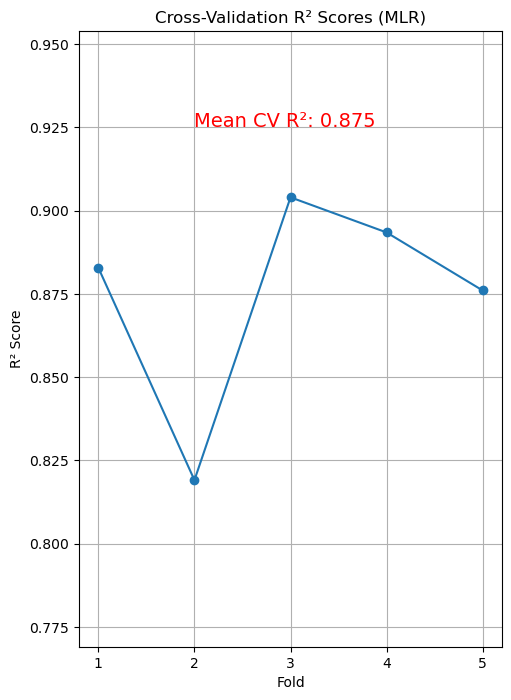

In [88]:
# Plotting the CV scores
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-')  # Adjusted x-axis to start from 1
plt.title('Cross-Validation R² Scores (MLR)')
plt.xlabel('Fold')
plt.xticks(range(1, 6))  # Set x-ticks to match fold numbers
plt.ylabel('R² Score')
plt.ylim(min(cv_scores) - 0.05, max(cv_scores) + 0.05)  # Dynamically adjust y-axis limits
plt.grid(True)
# Annotate mean R² score
mean_r2 = np.mean(cv_scores)
plt.annotate(f'Mean CV R²: {mean_r2:.3f}', xy=(2, .925), color='red', fontsize=14),
plt.show()

In [89]:
lasso.intercept_ 

214921.99584042092

In [90]:
lasso.feature_names_in_

array(['GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'Fireplaces', 'TotalBath',
       'LotArea', 'MasVnrArea', 'GarageArea', 'YearRemodAdd',
       'TotRmsAbvGrd', 'GarageYrBlt', 'PoolArea', 'YrSold', 'MoSold',
       'LotFrontage', 'OpenPorchSF', 'OverallCond_2', 'OverallCond_3',
       'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'OverallQual_10', 'OverallQual_2',
       'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_NoBsmt', 'BsmtQual_Po', 'BsmtQual_TA',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_Po',
       'KitchenQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
       'BsmtExposure_No', 'BsmtExposure_NoBsmt', 'FireplaceQu_Fa',
       'FireplaceQu_Gd', 'FireplaceQu_NoFireplac

In [91]:
pd.set_option('display.max_rows', 500)
coef_series = pd.Series(
  data=lasso.coef_,
  index=lasso.feature_names_in_
)

coef_series.sort_values(ascending = False)

Neighborhood_GrnHill       113508.843546
OverallQual_10             102084.212521
OverallQual_9               53092.998733
GrLivArea                   41368.581319
KitchenQual_Po              40712.790851
YearBuilt                   28283.546375
OverallCond_9               25405.676160
Neighborhood_Crawfor        22635.751253
Neighborhood_StoneBr        22410.688587
Neighborhood_NoRidge        19798.530007
OverallCond_8               13641.115410
TotalBsmtSF                 13305.153703
Neighborhood_NridgHt        11309.929524
Foundation_Stone            11280.571982
OverallQual_8               10925.146993
Fireplaces                   8443.174890
BsmtExposure_Gd              8003.007550
Neighborhood_BrkSide         7135.923061
Neighborhood_NPkVill         6525.036842
FireplaceQu_NoFireplace      6114.155053
OverallCond_7                6021.178239
OverallQual_3                5639.139195
BsmtQual_Fa                  5161.118696
Neighborhood_ClearCr         4212.893929
LotArea         

In [92]:
lasso = Lasso(alpha=1, tol=0.1)
fold_num=1
best_params_list = []
best_scores_list = []
coefficients_list = []
param_grid = {
    'alpha': np.linspace(1, 200)
}
grid_search = GridSearchCV(Lasso(), param_grid, cv=kf, scoring='r2', n_jobs = -1,  return_train_score=True)
grid_search.fit(df_encoded, SalePrice)
print('Best Estimator: ',grid_search.best_estimator_)
print('Best Params: ',grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)
# Store best parameters and score
best_params_list.append({
    'params':grid_search.best_params_,
    # 'fold': fold_num,
    })
best_score = grid_search.best_score_
best_scores_list.append({
    'score':best_score,
    # 'fold':fold_num
    })
# Store coefficients of the best model
best_model = grid_search.best_estimator_
coefficients_list.append({
    'coef': best_model.coef_,
    # 'fold':fold_num
    })
print('Best Params List:', best_params_list)
print('Best Scores List:',best_scores_list)

Best Estimator:  Lasso(alpha=17.244897959183675)
Best Params:  {'alpha': 17.244897959183675}
Best Score:  0.8970039431097565
Best Params List: [{'params': {'alpha': 17.244897959183675}}]
Best Scores List: [{'score': 0.8970039431097565}]
